## Compare performance of models between two test sets
The comparison can be used to analyse the extrapolation capabilities of the models. For this, one test set must be based on the same parameter distribution as the training set, while the second dataset had adjusted distributions.\
This analysis requires, that the performance of the models on both datasets was already evaluated with the "model_evaluaion.ipynb" notebook.

In [ ]:
from fermfaultdetect.utils import get_models_dir, get_evaluation_dir
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from fermfaultdetect.visualizations import visualize
import numpy as np

seed = 42 # set seeding for reproducibility

### Set folder for saving

In [2]:
### Choose name to save results ###
save_folder_name = "extrapolation_diff" 
###################################

model_dir = get_models_dir()
evaluation_dir = get_evaluation_dir()

save_dir = os.path.join(evaluation_dir, save_folder_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

### Load metrics

In [3]:
### Enter name of performance results on first set ###
val_metrics_name = "validation"
######################################################

FDR_detect_val_dir = os.path.join(model_dir, val_metrics_name, "FDR_detect_models.csv")
FDR_diagnosis_val_dir = os.path.join(model_dir, val_metrics_name, "FDR_diagnosis_models.csv")
overall_val_dir = os.path.join(model_dir, val_metrics_name, "overall_metrics.csv")

FDR_detect_val = pd.read_csv(FDR_detect_val_dir)
FDR_diagnosis_val = pd.read_csv(FDR_diagnosis_val_dir)
overall_val = pd.read_csv(overall_val_dir)

In [4]:
### Enter name of performance results on second set ###
extrapol_metrics_name = "validation_extrapolation"
#######################################################

FDR_detect_ex_dir = os.path.join(model_dir, extrapol_metrics_name, "FDR_detect_models.csv")
FDR_diagnosis_ex_dir = os.path.join(model_dir, extrapol_metrics_name, "FDR_diagnosis_models.csv")
overall_ex_dir = os.path.join(model_dir, extrapol_metrics_name, "overall_metrics.csv")

FDR_detect_ex = pd.read_csv(FDR_detect_ex_dir)
FDR_diagnosis_ex = pd.read_csv(FDR_diagnosis_ex_dir)
overall_ex = pd.read_csv(overall_ex_dir)

### Comparisons

In [5]:
def calculate_difference(df1, df2, exclude_column):
    num_columns = df1.columns.difference([exclude_column])
    diff = df1[num_columns] - df2[num_columns]
    diff[exclude_column] = df1[exclude_column]
    diff = diff[[exclude_column] + list(num_columns)]
    return diff

#FDR_diagnosis_diff = (FDR_diagnosis_val.drop(columns=["Fault type"]))-(FDR_diagnosis_ex.drop(columns=["Fault type"]))
FDR_detect_diff = calculate_difference(FDR_detect_ex, FDR_detect_val, "Fault type")
pd.DataFrame(FDR_detect_diff).to_csv(os.path.join(save_dir, "FDR_detect_diff.csv"), index=False)
FDR_diagnosis_diff = calculate_difference(FDR_diagnosis_ex, FDR_diagnosis_val, "Fault type")
pd.DataFrame(FDR_diagnosis_diff).to_csv(os.path.join(save_dir, "FDR_diagnosis_diff.csv"), index=False)
overall_diff = calculate_difference(overall_ex, overall_val, "Models")
pd.DataFrame(overall_diff).to_csv(os.path.join(save_dir, "overall_diff.csv"), index=False)

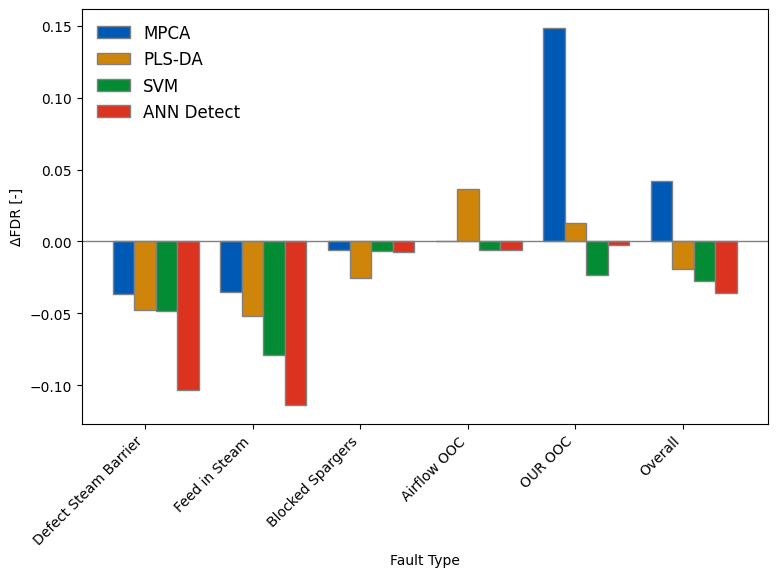

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

# Define the bar width
bar_width = 0.2

# Set positions of the bars on the x-axis
r1 = np.arange(len(FDR_detect_diff))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
colors = visualize.get_thesis_colors()
plt.bar(r1, FDR_detect_diff['MPCA'], color=colors["blue"], width=bar_width, edgecolor='grey', label='MPCA')
plt.bar(r2, FDR_detect_diff['PLS-DA'], color=colors["lemon"], width=bar_width, edgecolor='grey', label='PLS-DA')
plt.bar(r3, FDR_detect_diff['SVM'], color=colors["green"], width=bar_width, edgecolor='grey', label='SVM')
plt.bar(r4, FDR_detect_diff['ANN Detect'], color=colors["red"], width=bar_width, edgecolor='grey', label='ANN Detect')

# Add labels
plt.xlabel('Fault Type')
plt.ylabel('ΔFDR [-]')
#plt.ylim(0, 1)

plt.xticks([r + bar_width for r in range(len(FDR_detect_diff))], FDR_detect_diff['Fault type'], rotation=45, ha='right')
ax.axhline(y=0, color='grey', linewidth=1) # add horizontal line at 0

#plt.rcParams['figure.dpi'] = 300  # High resolution for saving
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "FDR_detect_diff.png"), dpi=300)
plt.show()

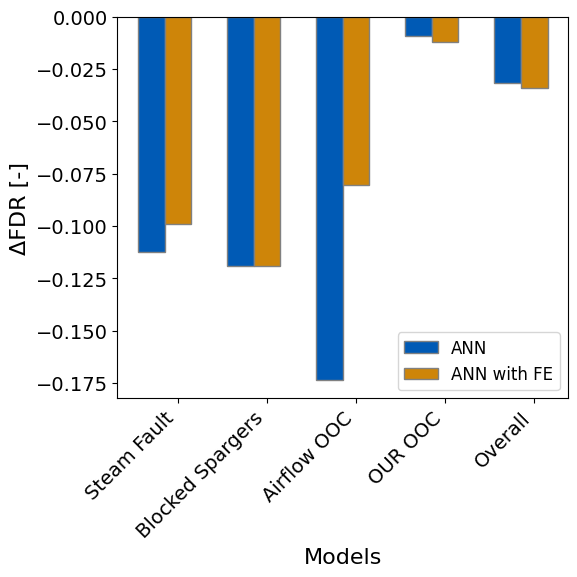

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

# Define the bar width
bar_width = 0.3

# Set positions of the bars on the x-axis
r1 = np.arange(len(FDR_diagnosis_diff))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
colors = visualize.get_thesis_colors()
plt.bar(r1, FDR_diagnosis_diff['ANN'], color=colors["blue"], width=bar_width, edgecolor='grey', label='ANN')
plt.bar(r2, FDR_diagnosis_diff['ANN with FE'], color=colors["lemon"], width=bar_width, edgecolor='grey', label='ANN with FE')

# Add labels
plt.xlabel('Models')
plt.ylabel('ΔFDR [-]')
plt.xticks([r + bar_width for r in range(len(FDR_diagnosis_diff))], FDR_diagnosis_diff['Fault type'], rotation=45, ha='right')

# Create legend & Show graphic

#plt.rcParams['figure.dpi'] = 300  # High resolution for saving
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "FDR_diagnosis_diff.png"), dpi=300)
plt.show()

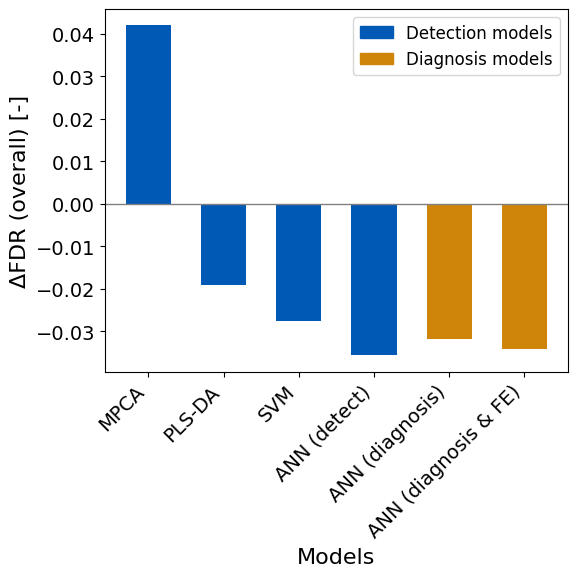

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Define the bar width
bar_width = 0.6

# Set positions of the bars on the x-axis
r1 = np.arange(len(overall_diff))

# Make the plot
colors = visualize.get_thesis_colors()
colors_plot = [colors["blue"], colors["blue"], colors["blue"], colors["blue"], colors["lemon"], colors["lemon"]]
plt.bar(r1, overall_diff['Fault detection rate'], color=colors_plot, width=bar_width, label='Models')

# Add labels
plt.xlabel('Models')
plt.ylabel('ΔFDR (overall) [-]')

plt.xticks(r1, overall_diff['Models'], rotation=45, ha='right')
ax.axhline(y=0, color='grey', linewidth=1) # add horizontal line at 0

# Create custom legend handles
detect_model_patch = mpatches.Patch(color=colors["blue"], label='Detection models')
diagnosis_model_patch = mpatches.Patch(color=colors["lemon"], label='Diagnosis models')

# Create legend & Show graphic
#plt.rcParams['figure.dpi'] = 300  # High resolution for saving
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.legend(handles=[detect_model_patch, diagnosis_model_patch], loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "overall_FDR_diff.png"), dpi=300)
plt.show()

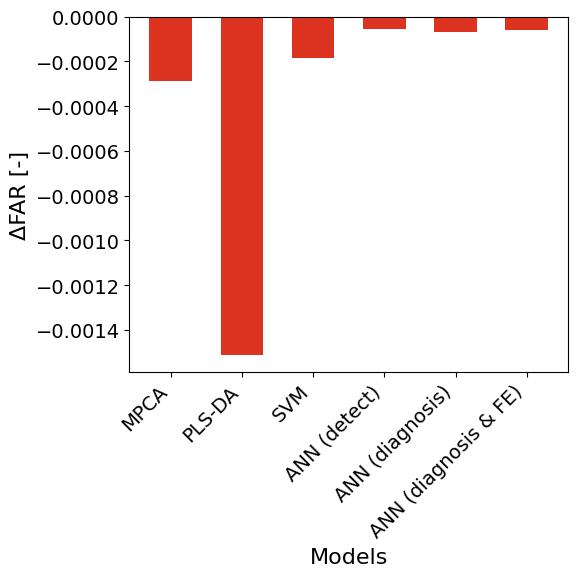

In [9]:
# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Define the bar width
bar_width = 0.6

# Set positions of the bars on the x-axis
r1 = np.arange(len(overall_diff))

# Make the plot
plt.bar(r1, overall_diff['False alarm rate'], color=colors["red"], width=bar_width, label='Models')

# Add labels
plt.xlabel('Models')
plt.ylabel('ΔFAR [-]')
#plt.ylim(0, 0.06)

plt.xticks(r1, overall_diff['Models'], rotation=45, ha='right')

# Create legend & Show graphic
#plt.rcParams['figure.dpi'] = 300  # High resolution for saving
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "overall_FAR_diff.png"), dpi=300)
plt.show()